# Ensemble - Boosting Model
부스팅(Boosting)이란 <span style='background-color:#fff5b1'>**단순하고 약한 학습기(Weak Learner)**</span> 들를 결합해서 보다 정확하고 강력한 학습기(Strong Learner)를 만드는 방식.  
정확도가 낮은 하나의 모델을 만들어 학습 시킨뒤, 그 모델의 예측 오류는 두 번째 모델이 보완한다. 이 두 모델을 합치면 처음보다는 정확한 모델이 만들어 진다. 합쳐진 모델의 예측 오류는 다음 모델에서 보완하여 계속 더하는 과정을 반복한다. 즉 **약한 학습기들은 앞 학습기가 만든 오류를 줄이는 방향으로 학습한다**

>- 첫번째 모델은 학습하고 오차가 발생한다.
>- 두번째 모델은 첫번째 오차를 줄이는 학습을 한다.
>- 그 다음 모델도 앞에서 생긴 오차를 줄이는 학습을 진행한다.


# GradientBoosting
- 개별 모델로 Decision Tree 를 사용한다. 
- <span style='background-color:#fff5b1'>**depth가 깊지 않은 트리(단순한 모델)**</span>를 많이 연결해서 이전 트리의 오차를 보정해 나가는 방식으로 실행한다.
- 각 모델들은 앞의 모델이 <span style='background-color:#fff5b1'>**틀린 오차**</span>를 학습하여 전체 오차가 줄어들드록 학습한다.
- 얕은 트리를 많이 연결하여 각각의 트리가 데이터의 일부에 대해 예측을 잘 수행하도록 하고 그런 트리들이 모여 전체 성능을 높이는 것이 기본 아이디어.
- 분류와 회귀 둘다 지원하는 모델 (GradientBoostingClassifier, GrandientBoostingRegressor)
- <span style='background-color:#fff5b1'>**훈련시간이 많이 걸리고**</span>, 트리기반 모델의 특성상 희소한 고차원 데이터에서는 성능이 안 좋은 단점이 있다.

> - 단순한 모델(성능이 떨어진) 여러개를 사용한다.
> - 앞에 모델이 학습한 이후 다음 모델이 학습한다. 즉, 순차적으로 일을 진행한다. => 시간이 오래걸린다.

## GradientBoosting 학습 및 추론 프로세스

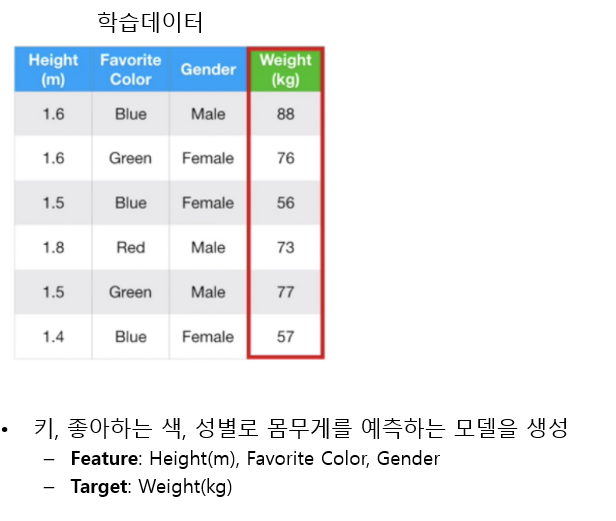

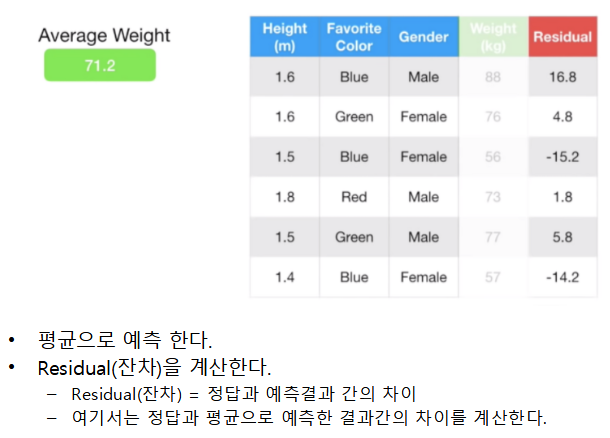

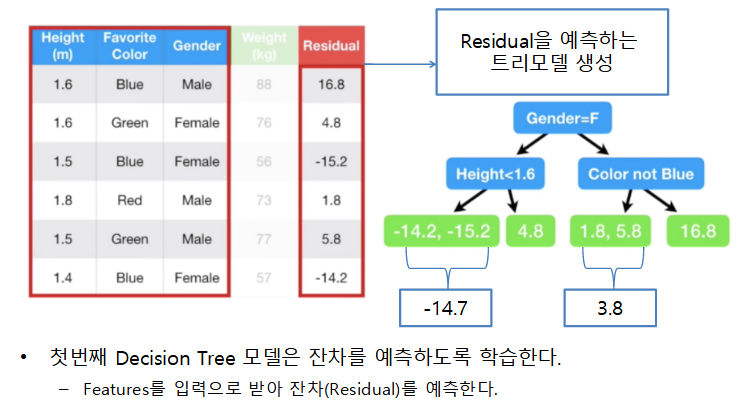

> - 첫 번째 모델에서 생긴 잔차(오차)를 그 다음 모델들이 찾아간다.

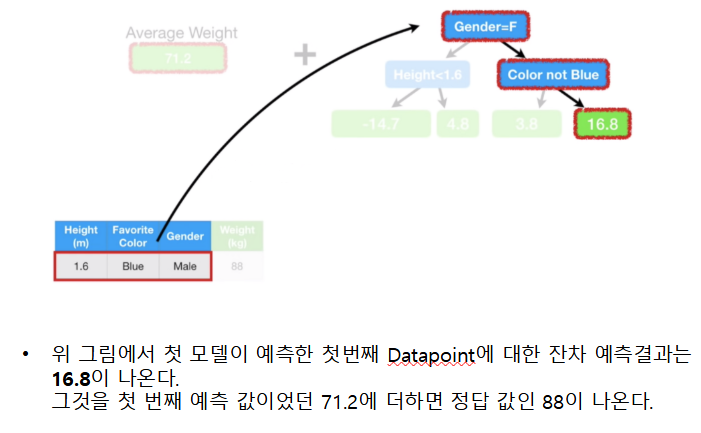

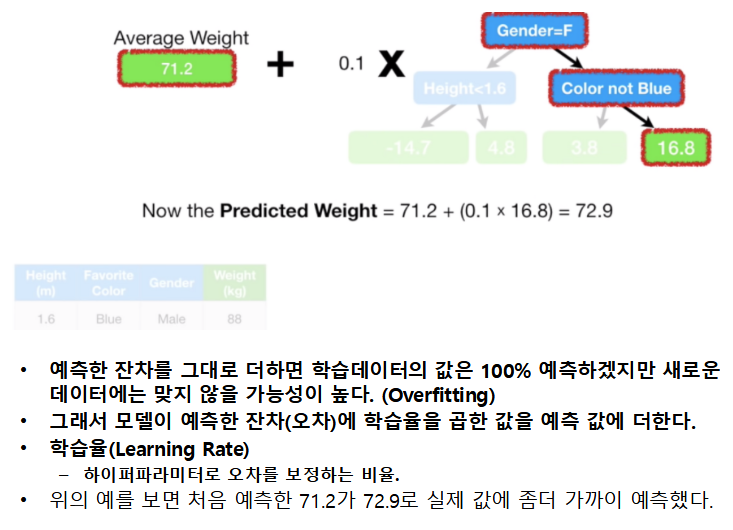

> - 16.8 * 0.1 은 16.8에 10%만 학습한다는 뜻이다.

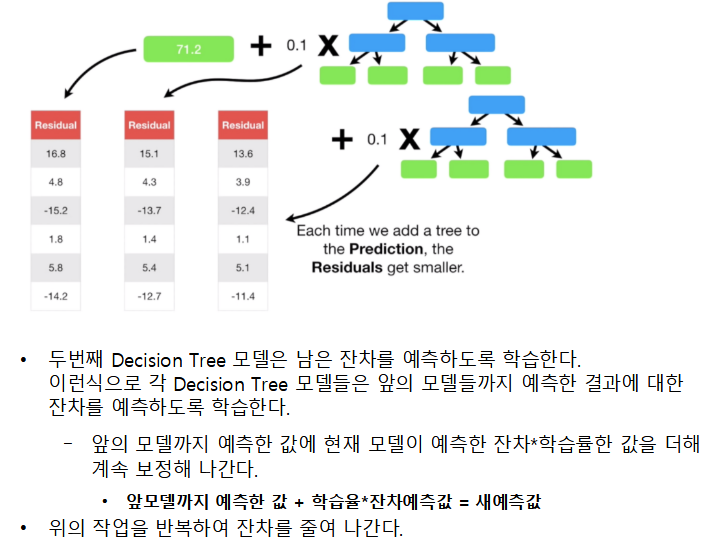

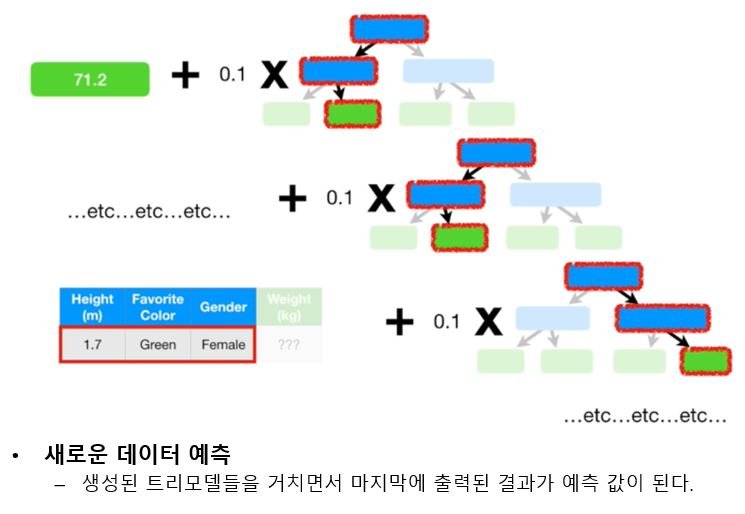

이미지 참조: https://www.youtube.com/watch?v=3CC4N4z3GJc&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=49

> - 유투브 영상 보기

### 주요 파라미터
- **Decision Tree 의 가지치기 관련 매개변수**
    - 각각의 decision tree가 복잡한 모델이 되지 않도록 한다. 

- <span style='background-color:#fff5b1'>**learning rate**</span>
    - 이전 decision tree의 오차를 얼마나 강하게 보정할 것인지 제어하는 값. 
    - <span style='background-color:#fff5b1'>**값이 크면**</span> 보정을 강하게 하여 <span style='background-color:#fff5b1'>**복잡한 모델을 만든다. 학습데이터의 정확도는 올라가지만 과대적합**</span>이 날 수있다. 
    - <span style='background-color:#fff5b1'>**값을 작게**</span> 잡으면 보정을 약하게 하여 <span style='background-color:#fff5b1'>**모델의 복잡도를 줄인다. 과대적합을 줄일 수 있지만 성능 자체가 낮아질 수있다.**
    - 기본값 : 0.1

- <span style='background-color:#fff5b1'>**n_estimators**</span>
    - decision tree의 개수 지정. 많을 수록 복잡한 모델이 된다.

>- n_estimators
>    - 값이 크면 => 복잡한 모델,
>    - 값이 작으면 => 단순한 모델

- **n_iter_no_change, validation_fraction**
    - validation_fraction에 지정한 비율만큼 n_iter_no_change에 지정한 반복 횟수동안 검증점수가 좋아 지지 않으면 훈련을 조기 종료한다.

- **보통 max_depth를 낮춰 개별 decision tree의 복잡도를 낮춘다. 보통 5가 넘지 않게 설정한다. 그리고 <span style='background-color:#fff5b1'>n_estimators를 가용시간, 메모리 한도에 맞춰 크게 설정</span>하고 적절한 <span style='background-color:#fff5b1'>learning_rate을 찾는다.**</span>

### 위스콘신 유방암 데이터

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

##### GradientBoostingClassifier 모델 생성, 학습, 평가

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 0)
gb.fit(X_train, y_train)

train_pred = gb.predict(X_train)
test_pred = gb.predict(X_test)

train_proba = gb.predict_proba(X_train)[:, 1]
test_proba = gb.predict_proba(X_test)[:, 1]

In [7]:
# 평가
from metrics import print_metrics_classification as pmc1 , print_metrics_classification2 as pmc2

pmc1(y_train, train_pred, "train set")
print('='*50)
pmc1(y_test, test_pred, 'test set')

train set
정확도(accuracy): 1.0
재현율/민감도(recall): 1.0
정밀도(precision): 1.0
F1-score: 1.0
test set
정확도(accuracy): 0.958041958041958
재현율/민감도(recall): 0.9555555555555556
정밀도(precision): 0.9772727272727273
F1-score: 0.9662921348314608


In [8]:
pmc2(y_train, train_proba, 'train set')
print('='*50)
pmc2(y_test, test_proba, 'test set')

train set
Average Precision: 1.0
roc_auc: 1.0
test set
Average Precision: 0.9741338688529869
roc_auc: 0.9776729559748428


##### Feature 중요도를 조회

In [9]:
gb.feature_importances_

array([2.39984651e-04, 1.20910416e-02, 1.79085205e-04, 1.05299422e-04,
       5.19219806e-06, 1.29802157e-05, 2.30753447e-03, 7.56345638e-02,
       1.91792783e-03, 2.25537145e-05, 2.46518294e-03, 6.19995776e-03,
       5.79815763e-05, 1.36155106e-02, 1.35590563e-03, 4.19968871e-03,
       1.59590315e-04, 8.44137659e-03, 3.41690813e-05, 0.00000000e+00,
       1.31204617e-01, 4.39370209e-02, 4.94771032e-01, 1.99809970e-02,
       4.64259544e-03, 1.77580029e-03, 9.07218285e-03, 1.62169504e-01,
       3.38345430e-03, 1.72707509e-05])

In [10]:
import pandas as pd
pd.Series(gb.feature_importances_).sort_values(ascending = False)

22    0.494771
27    0.162170
20    0.131205
7     0.075635
21    0.043937
23    0.019981
13    0.013616
1     0.012091
26    0.009072
17    0.008441
11    0.006200
24    0.004643
15    0.004200
28    0.003383
10    0.002465
6     0.002308
8     0.001918
25    0.001776
14    0.001356
0     0.000240
2     0.000179
16    0.000160
3     0.000105
12    0.000058
18    0.000034
9     0.000023
29    0.000017
5     0.000013
4     0.000005
19    0.000000
dtype: float64

### learning rate 변화에 따른 성능 변화


In [11]:
max_depth = 1 # 기본값: 3 => 1 (좀더 단순한 모델들. ==> 각각의 DT)
n_estimators = 1000 # 기본: 100 => 1000 (복잡한 모델 ==> GB)
lr = 0.0001 # 학습율 값 - 기본: 0.1, train: 0.6267,  test: 0.6293
# lr = 0.001  # train: 0.9413, test: 0.916
# lr = 0.01   # train: 0.9953, test: 0.9580
# lr = 0.1    # train: 1,      test: 0.9580
# lr = 0.5    # train: 1,      test: 0.961

gb2 = GradientBoostingClassifier(n_estimators = n_estimators, 
                                 max_depth = max_depth,
                                learning_rate = lr,
                                random_state = 0)

gb2.fit(X_train, y_train)

train_pred2 = gb2.predict(X_train)
test_pred2 = gb2.predict(X_test)

In [12]:
# lr = 0.0001
pmc1(y_train, train_pred2, f'Train, LR: {lr}')
print('='*50)
pmc1(y_test, test_pred2, f'Test, LR: {lr}')

Train, LR: 0.0001
정확도(accuracy): 0.6267605633802817
재현율/민감도(recall): 1.0
정밀도(precision): 0.6267605633802817
F1-score: 0.7705627705627706
Test, LR: 0.0001
정확도(accuracy): 0.6293706293706294
재현율/민감도(recall): 1.0
정밀도(precision): 0.6293706293706294
F1-score: 0.7725321888412017


### - lr: 0.0001 => 0.001 변화.

In [18]:
# lr = 0.001
pmc1(y_train, train_pred2, f'Train, LR: {lr}')
print('='*50)
pmc1(y_test, test_pred2, f'Test, LR: {lr}')

Train, LR: 0.001
정확도(accuracy): 0.9413145539906104
재현율/민감도(recall): 0.9887640449438202
정밀도(precision): 0.9230769230769231
F1-score: 0.9547920433996384
Test, LR: 0.001
정확도(accuracy): 0.916083916083916
재현율/민감도(recall): 0.9888888888888889
정밀도(precision): 0.89
F1-score: 0.9368421052631579


In [20]:
# lr = 0.01 
pmc1(y_train, train_pred2, f'Train, LR: {lr}')
print('='*50)
pmc1(y_test, test_pred2, f'Test, LR: {lr}')

Train, LR: 0.01
정확도(accuracy): 0.9953051643192489
재현율/민감도(recall): 1.0
정밀도(precision): 0.9925650557620818
F1-score: 0.9962686567164178
Test, LR: 0.01
정확도(accuracy): 0.958041958041958
재현율/민감도(recall): 0.9666666666666667
정밀도(precision): 0.9666666666666667
F1-score: 0.9666666666666667


In [22]:
# lr = 0.1 
pmc1(y_train, train_pred2, f'Train, LR: {lr}')
print('='*50)
pmc1(y_test, test_pred2, f'Test, LR: {lr}')

Train, LR: 0.1
정확도(accuracy): 1.0
재현율/민감도(recall): 1.0
정밀도(precision): 1.0
F1-score: 1.0
Test, LR: 0.1
정확도(accuracy): 0.958041958041958
재현율/민감도(recall): 0.9555555555555556
정밀도(precision): 0.9772727272727273
F1-score: 0.9662921348314608


In [24]:
# lr = 0.5 
pmc1(y_train, train_pred2, f'Train, LR: {lr}')
print('='*50)
pmc1(y_test, test_pred2, f'Test, LR: {lr}')

Train, LR: 0.5
정확도(accuracy): 1.0
재현율/민감도(recall): 1.0
정밀도(precision): 1.0
F1-score: 1.0
Test, LR: 0.5
정확도(accuracy): 0.965034965034965
재현율/민감도(recall): 0.9666666666666667
정밀도(precision): 0.9775280898876404
F1-score: 0.9720670391061451


### GridSearchCV 이용해 최적의 하이퍼파라미터 찾기

##### RandomizedSearchCV 생성
- n_estimators
- learning_rate
- max_depth
- subsample

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [63]:
params = {
    "n_estimators" : range(1000,5001,1000),
    'learning_rate' : [0.001, 0.05, 0.01, 0.1, 0.5],
    'max_depth' : [1, 2, 3],
    'subsample' : [0.5, 0.6, 0.7, 0.8, 0.9, 1.0] # subsample의 양을 정하는 퍼센테이지 => 데이터양을 줄이면 학습 속도가 빨라진다.
}

rs = RandomizedSearchCV(gb,
                        params,
                       scoring = 'accuracy',
                        n_iter = 60, # 전체 Hyper parameter 조합중 임의의 60개 조합만 테스트 진행.
                        cv = 4,
                        n_jobs = -1
                       )
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.05, 0.01,
                                                          0.1, 0.5],
                                        'max_depth': [1, 2, 3],
                                        'n_estimators': range(1000, 5001, 1000),
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   scoring='accuracy')

In [64]:
print(rs.best_params_)
rs.best_score_

{'subsample': 0.6, 'n_estimators': 5000, 'max_depth': 1, 'learning_rate': 0.5}


0.9742108975489332

In [65]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score')
rs_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
1,3.068215,0.874196,0.001874,0.000218,0.6,5000,1,0.5,"{'subsample': 0.6, 'n_estimators': 5000, 'max_...",0.953271,0.981308,0.971698,0.990566,0.974211,0.013808,1
49,3.111636,0.020025,0.003524,0.002079,0.5,4000,1,0.01,"{'subsample': 0.5, 'n_estimators': 4000, 'max_...",0.943925,0.981308,0.971698,0.990566,0.971874,0.017461,2
25,2.451195,0.177190,0.002967,0.001738,0.7,2000,2,0.05,"{'subsample': 0.7, 'n_estimators': 2000, 'max_...",0.953271,0.971963,0.981132,0.981132,0.971874,0.011374,3
3,3.258231,0.179881,0.002448,0.000125,0.7,4000,2,0.05,"{'subsample': 0.7, 'n_estimators': 4000, 'max_...",0.953271,0.971963,0.981132,0.981132,0.971874,0.011374,3
32,2.278631,0.075833,0.001956,0.000099,0.5,4000,2,0.1,"{'subsample': 0.5, 'n_estimators': 4000, 'max_...",0.953271,0.971963,0.981132,0.981132,0.971874,0.011374,3
53,1.986577,0.116454,0.001744,0.000079,0.5,3000,2,0.1,"{'subsample': 0.5, 'n_estimators': 3000, 'max_...",0.953271,0.971963,0.981132,0.981132,0.971874,0.011374,3
38,3.057211,0.122799,0.002505,0.000097,0.6,4000,3,0.05,"{'subsample': 0.6, 'n_estimators': 4000, 'max_...",0.953271,0.971963,0.981132,0.981132,0.971874,0.011374,3
35,6.028909,0.040693,0.006461,0.001290,0.5,4000,3,0.01,"{'subsample': 0.5, 'n_estimators': 4000, 'max_...",0.943925,0.971963,0.981132,0.981132,0.969538,0.015254,8
0,2.502611,0.084900,0.001961,0.000076,0.7,4000,2,0.1,"{'subsample': 0.7, 'n_estimators': 4000, 'max_...",0.943925,0.971963,0.981132,0.981132,0.969538,0.015254,8
4,1.412455,0.032702,0.001347,0.000035,0.7,1000,2,0.05,"{'subsample': 0.7, 'n_estimators': 1000, 'max_...",0.943925,0.971963,0.981132,0.981132,0.969538,0.015254,8


In [66]:
best_rs = rs.best_estimator_

In [67]:
print(accuracy_score(y_test, rs.predict(X_test)))
accuracy_score(y_test, best_rs.predict(X_test))

0.958041958041958


0.958041958041958

##### Feature importance

In [69]:
rs_s = pd.Series(best_rs.feature_importances_).sort_values(ascending = False)
rs_s

23    5.797703e-01
27    2.421680e-01
7     9.001438e-02
21    3.097935e-02
14    1.039760e-02
8     8.375698e-03
28    8.265854e-03
11    6.113631e-03
24    6.031265e-03
13    5.770776e-03
1     3.419180e-03
6     2.394608e-03
16    1.249478e-03
20    1.058712e-03
26    9.289811e-04
10    7.639174e-04
29    6.500619e-04
9     5.277232e-04
18    5.140008e-04
19    2.515077e-04
15    1.931358e-04
12    1.000324e-04
2     3.105013e-05
5     2.180996e-05
25    8.513702e-06
17    2.704490e-07
4     8.326455e-08
3     6.708541e-09
22    1.105829e-11
0     0.000000e+00
dtype: float64

# <span style='background-color:#fff5b1'>XGBoost(Extra Gradient Boost)</span>
- light gvm
- https://xgboost.readthedocs.io/ 
- Gradient Boost 알고리즘을 기반으로 개선해서 분산환경에서도 실행할 수 있도록 구현 나온 모델.
- Gradient Boost의 단점인 느린수행시간을 해결하고 과적합을 제어할 수 있는 규제들을 제공하여 성능을 높임.
- 회귀와 분류 모두 지원한다.
- 캐글 경진대회에서 상위에 입상한 데이터 과학자들이 사용한 것을 알려져 유명해짐.
- 두가지 개발 방법
    - [Scikit-learn 래퍼 XGBoost 모듈 사용](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)
    - [파이썬 래퍼 XGBoost 모듈 사용](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.training)
- 설치
    - conda install -y -c anaconda py-xgboost   
    - pip install xgboost


In [2]:
import xgboost

## Scikit-learn 래퍼 XGBoost
- XGBoost를 Scikit-learn프레임워크와 연동할 수 있도록 개발됨.
- Scikit-learn의 Estimator들과 동일한 패턴으로 코드를 작성할 수 있다.
- GridSearchCV나 Pipeline 등 Scikit-learn이 제공하는 다양한 유틸리티들을 사용할 수 있다.
- <span style='background-color:#fff5b1'>XGBClassifier</span>: 분류
- <span style='background-color:#fff5b1'>XGBRegressor</span>: 회귀 

### 주요 매개변수
- learning_rate : 학습률, 보통 0.01 ~ 0.2 사이의 값 사용
- n_estimators : week tree 개수
- Decision Tree관련 하이퍼파라미터들

### 예제

In [13]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.01, max_depth = 2, random_state = 0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

##### feature importance

In [16]:
fi = pd.Series(xgb.feature_importances_)
fi.sort_values(ascending = False)

22    0.317715
7     0.191484
27    0.150696
20    0.077119
23    0.050489
11    0.037051
26    0.029967
21    0.025489
0     0.022118
13    0.016181
6     0.015403
1     0.013993
10    0.012032
8     0.011944
24    0.009557
29    0.005800
12    0.005580
28    0.005041
18    0.002342
16    0.000000
17    0.000000
19    0.000000
14    0.000000
9     0.000000
5     0.000000
4     0.000000
25    0.000000
3     0.000000
2     0.000000
15    0.000000
dtype: float32

In [17]:
pmc1(y_train, xgb.predict(X_train))

정확도(accuracy): 0.9953051643192489
재현율/민감도(recall): 0.9962546816479401
정밀도(precision): 0.9962546816479401
F1-score: 0.9962546816479401


In [18]:
pmc1(y_test, xgb.predict(X_test))

정확도(accuracy): 0.951048951048951
재현율/민감도(recall): 0.9555555555555556
정밀도(precision): 0.9662921348314607
F1-score: 0.9608938547486034
